# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Material de Apoio - Testando Técnicas para Análise de Grandes Bases de Dados (ver Vídeo)

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn import preprocessing
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import scipy
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
from scipy.spatial.distance import pdist

# Acelerando cálculo de distâncias
### Comparando KNN com e sem KD-Tree

Gerando um conjunto de dados com 250 mil objetos e 2 atributos

In [ ]:
X, y = make_blobs(n_samples=250000, centers=3, n_features=2, random_state=0)

Dividindo em treino (90%) e teste (10%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(225000, 2)

In [ ]:
X_test.shape

(25000, 2)

Instanciando knn com e sem kd-tree

In [ ]:
# sem kd-tree
knn1 = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
knn1.fit(X_train,y_train)

# com kd-tree
knn2 = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Comparando o tempo de classificação

In [ ]:
%time knn1.predict(X_test)

CPU times: user 1min 21s, sys: 5.56 s, total: 1min 27s
Wall time: 1min 13s


array([1, 1, 2, ..., 1, 2, 0])

In [ ]:
%time knn2.predict(X_test)

CPU times: user 872 ms, sys: 30.6 ms, total: 902 ms
Wall time: 877 ms


array([1, 1, 2, ..., 1, 2, 0])

# Amostragem de Dados
### Comparando k-Means com Mini-Batch k-Means

Gerando um conjunto de dados com 5 milhões de objetos e 2 atributos.

In [ ]:
X, y = make_blobs(n_samples=5000000, centers=3, n_features=2, random_state=0)

Verificando o tempo de agrupamento obtido com o k-means.

In [ ]:
%time kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

CPU times: user 27.3 s, sys: 2.77 s, total: 30 s
Wall time: 26.4 s


Verificando o tempo de agrupamento obtido com o MiniBatchKMeans

In [ ]:
%time mini_batch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=10000).fit(X)

CPU times: user 2.19 s, sys: 170 ms, total: 2.36 s
Wall time: 2.21 s


Vamos comparar também a qualidade dos agrupamentos obtidos

In [ ]:
print('ARI do kMeans=',adjusted_rand_score(kmeans.labels_, y))
print('ARI do Mini-Batch-kMeans=',adjusted_rand_score(mini_batch_kmeans.labels_, y))

ARI do kMeans= 0.774973843535662
ARI do Mini-Batch-kMeans= 0.774977370878373


# Representação Condensada dos Dados
## Testando o BIRCH

Gerando um conjunto de dados com 500 mil objetos e 2 atributos.

In [ ]:
X, y = make_blobs(n_samples=500000, centers=3, n_features=2, random_state=0)

Analisando o tempo de agrupamento obtido com o Birch

In [ ]:
%time birch = Birch(n_clusters=3,branching_factor=25,threshold=1.0).fit(X)

CPU times: user 8.83 s, sys: 101 ms, total: 8.93 s
Wall time: 8.85 s


In [ ]:
print('ARI do BIRCH=',adjusted_rand_score(birch.labels_, y))

ARI do BIRCH= 0.752659006418802


Verificando os centros de cada subcluster do Birch

In [ ]:
birch.subcluster_centers_

array([[-1.73104751,  3.91528953],
       [ 1.2995008 ,  1.05082094],
       [ 0.04652435,  4.57569911],
       [ 2.98231652,  0.24925057],
       [ 2.75012674,  1.82594824],
       [ 1.82403444,  4.05941591],
       [ 1.40020952,  5.51288545],
       [-1.65216953,  1.68880442],
       [ 0.89248219,  2.85205458],
       [ 1.42194045, -0.36982932],
       [-2.7870488 ,  2.87220378],
       [-0.70545819,  2.82112769]])

In [ ]:
birch.subcluster_centers_.shape

(12, 2)

Usando os subclusters do Birch para permitir executar outra tarefa que é custosa computacionalmente, como agrupamento hierárquico aglomerativo.

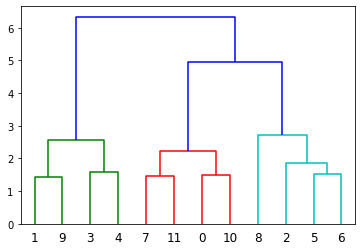

In [ ]:
M = pdist(birch.subcluster_centers_) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'complete')
dendrogram = hierarchy.dendrogram(Z)